In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
s = pd.Series(np.random.randn(4), name='daily returns')

In [102]:
s

0   -0.608204
1    0.067851
2    0.522923
3    0.612939
Name: daily returns, dtype: float64

PandasのSeriesは、Numpyのarrayと同様の操作が可能。

In [103]:
s*100

0   -60.820368
1     6.785072
2    52.292276
3    61.293938
Name: daily returns, dtype: float64

In [104]:
np.abs(s)#絶対値

0    0.608204
1    0.067851
2    0.522923
3    0.612939
Name: daily returns, dtype: float64

In [105]:
s.describe()#Pandas独自の機能

count    4.000000
mean     0.148877
std      0.558271
min     -0.608204
25%     -0.101163
50%      0.295387
75%      0.545427
max      0.612939
Name: daily returns, dtype: float64

In [106]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']#indexの変更が可能
s

AMZN   -0.608204
AAPL    0.067851
MSFT    0.522923
GOOG    0.612939
Name: daily returns, dtype: float64

In [107]:
#dictionariesと同様に使うことができる。制約条件は要素が全て同じ型であること。
s['AMZN']

-0.60820367520677243

In [108]:
'AAPL' in s

True

In [109]:
df =pd.read_csv('SMBC.csv')

In [110]:
type(df)

pandas.core.frame.DataFrame

In [111]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-06-01,3571.0,3602.0,3523.0,3537.0,6897000,3537.0
1,2016-06-02,3485.0,3491.0,3394.0,3401.0,8151900,3401.0
2,2016-06-03,3388.0,3443.0,3381.0,3411.0,5531900,3411.0
3,2016-06-06,3315.0,3354.0,3300.0,3353.0,7244100,3353.0
4,2016-06-07,3354.0,3376.0,3318.0,3365.0,6857100,3365.0
5,2016-06-08,3380.0,3418.0,3363.0,3415.0,6485200,3415.0
6,2016-06-09,3381.0,3393.0,3300.0,3319.0,8452200,3319.0
7,2016-06-10,3251.0,3296.0,3240.0,3275.0,12460200,3275.0


In [112]:
df[2:5]

,Date,Open,High,Low,Close,Volume,Adj Close
2,2016-06-03,3388.0,3443.0,3381.0,3411.0,5531900,3411.0
3,2016-06-06,3315.0,3354.0,3300.0,3353.0,7244100,3353.0
4,2016-06-07,3354.0,3376.0,3318.0,3365.0,6857100,3365.0


In [113]:
df[['Date', 'Adj Close']]

,Date,Adj Close
0,2016-06-01,3537.0
1,2016-06-02,3401.0
2,2016-06-03,3411.0
3,2016-06-06,3353.0
4,2016-06-07,3365.0
5,2016-06-08,3415.0
6,2016-06-09,3319.0
7,2016-06-10,3275.0


In [114]:
df.ix[2:5, ['Date', 'Volume', 'Adj Close']]

,Date,Volume,Adj Close
2,2016-06-03,5531900,3411.0
3,2016-06-06,7244100,3353.0
4,2016-06-07,6857100,3365.0
5,2016-06-08,6485200,3415.0


In [115]:
keep = ['Date', 'Volume', 'Adj Close']
df = df[keep]

In [116]:
df

,Date,Volume,Adj Close
0,2016-06-01,6897000,3537.0
1,2016-06-02,8151900,3401.0
2,2016-06-03,5531900,3411.0
3,2016-06-06,7244100,3353.0
4,2016-06-07,6857100,3365.0
5,2016-06-08,6485200,3415.0
6,2016-06-09,8452200,3319.0
7,2016-06-10,12460200,3275.0


In [117]:
Dates = df.pop('Date')

In [118]:
type(Dates)

pandas.core.series.Series

In [119]:
Dates

0    2016-06-01
1    2016-06-02
2    2016-06-03
3    2016-06-06
4    2016-06-07
5    2016-06-08
6    2016-06-09
7    2016-06-10
Name: Date, dtype: object

In [120]:
df.index = Dates

In [121]:
df

,Volume,Adj Close
Date,,
2016-06-01,6897000,3537.0
2016-06-02,8151900,3401.0
2016-06-03,5531900,3411.0
2016-06-06,7244100,3353.0
2016-06-07,6857100,3365.0
2016-06-08,6485200,3415.0
2016-06-09,8452200,3319.0
2016-06-10,12460200,3275.0


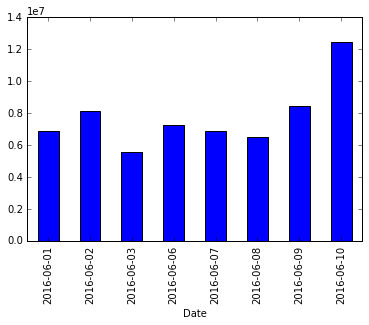

In [122]:
df['Volume'].plot(kind='bar')

In [126]:
df_descending = df.sort_values(by='Volume', ascending=False)

In [127]:
df_descending

,Volume,Adj Close
Date,,
2016-06-10,12460200,3275.0
2016-06-09,8452200,3319.0
2016-06-02,8151900,3401.0
2016-06-06,7244100,3353.0
2016-06-01,6897000,3537.0
2016-06-07,6857100,3365.0
2016-06-08,6485200,3415.0
2016-06-03,5531900,3411.0


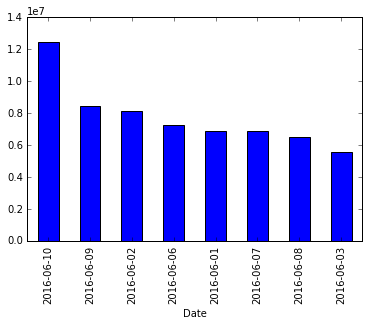

In [129]:
df_descending['Volume'].plot(kind='bar')

In [130]:
import urllib.request

In [133]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'

In [143]:
source = urllib.request.urlopen(url)

In [144]:
data = pd.read_csv(source, index_col=0, parse_dates=True, header=None)

In [145]:
type(data)

pandas.core.frame.DataFrame

In [146]:
data.head()

,1
0,
DATE,VALUE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9


In [147]:
data.describe()

,1
count,822
unique,81
top,5.7
freq,33


In [186]:
import pandas_datareader.data as web
import datetime as dt

In [188]:
start, end = dt.datetime(1948, 1, 1), dt.datetime(2015, 12, 31)
data = web.DataReader('UNRATE', 'fred', start, end)

In [189]:
type(data)

pandas.core.frame.DataFrame

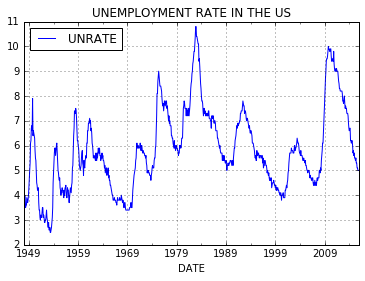

In [210]:
data.plot(title='UNEMPLOYMENT RATE IN THE US', grid=True)

Data from the World Bank

In [230]:
from pandas_datareader import wb

f = wb.download(indicator='NY.GDP.MKTP.CD', country=['JP', 'US'],
                start=1960, end=2011)
f2 = f.unstack(level=0)

In [231]:
f2.head(5)

NY.GDP.MKTP.CD              
country          Japan United States
year                                
1960      4.430734e+10  5.433000e+11
1961      5.350862e+10  5.633000e+11
1962      6.072302e+10  6.051000e+11
1963      6.949813e+10  6.386000e+11
1964      8.174901e+10  6.858000e+11

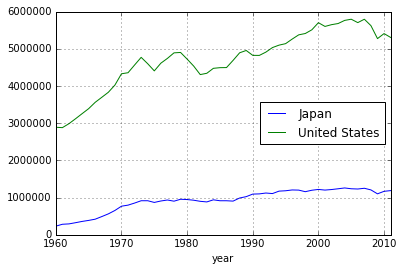

In [223]:
f2.columns = ['Japan', 'United States']#もとのデータのままではcolumns名が邪魔
f2.plot(grid=True)
plt.show()